# Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV Data and Display the first five

In [ ]:
url = 'justdoit_tweets_2018_09_07_2.csv'
data = pd.read_csv(url)
data.head(5)


,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True
3,NaN,"{'type': 'Point', 'coordinates': [-86.45594032...",Fri Sep 07 16:24:44 +0000 2018,"[0, 88]","{'hashtags': [{'text': 'kapernickeffect', 'ind...",NaN,0,False,#kapernickeffect #swoosh #justdoit @ Lucas Bis...,"{'type': 'Point', 'coordinates': [35.85402047,...",...,333333,True,False,ErvGotti609,1983.0,NaN,none,NaN,NaN,False
4,NaN,NaN,Fri Sep 07 16:24:39 +0000 2018,"[0, 132]","{'hashtags': [{'text': 'shaquem', 'indices': [...","{'media': [{'id': 1038100736595255296, 'id_str...",0,False,"One Hand, One Dream: The Shaquem Griffin Story...",NaN,...,1A1E1A,True,False,NoLuckNeeded,24989.0,NaN,none,http://t.co/MMGF9RfLz0,NaN,False


# Selecting oome columns needed for training our model

In [ ]:
columns_to_keep = ['tweet_full_text', 'tweet_created_at','tweet_favorite_count', 'tweet_retweet_count',
                   'user_followers_count', 'tweet_place', 'tweet_entities']

In [ ]:
# Restrict to the columns of interest
df= data[columns_to_keep]
df.head(3)

,tweet_full_text,tweet_created_at,tweet_favorite_count,tweet_retweet_count,user_followers_count,tweet_place,tweet_entities
0,Done is better than perfect. — Sheryl Sandberg...,Fri Sep 07 16:25:06 +0000 2018,0,0,57983.0,NaN,"{'hashtags': [{'text': 'quote', 'indices': [47..."
1,Shout out to the Great Fire Department and the...,Fri Sep 07 16:24:59 +0000 2018,0,0,13241.0,NaN,"{'hashtags': [{'text': 'hero', 'indices': [90,..."
2,There are some AMAZINGLY hilarious Nike Ad mem...,Fri Sep 07 16:24:50 +0000 2018,0,0,11377.0,NaN,"{'hashtags': [{'text': 'JustDoIt', 'indices': ..."


# Visulize some Columns to understand the Data

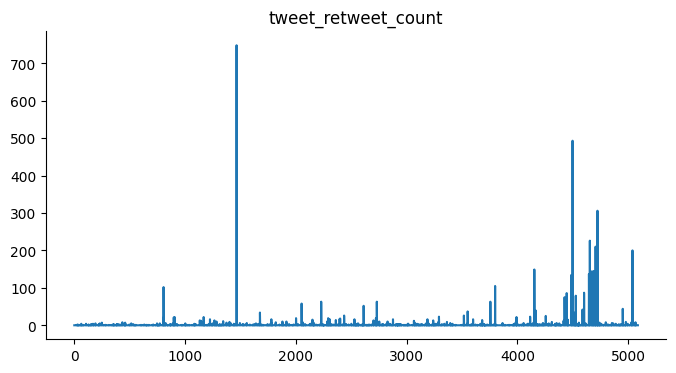

In [ ]:
# @title tweet_retweet_count
df['tweet_retweet_count'].plot(kind='line', figsize=(8, 4), title='tweet_retweet_count')
plt.gca().spines[['top', 'right']].set_visible(False)

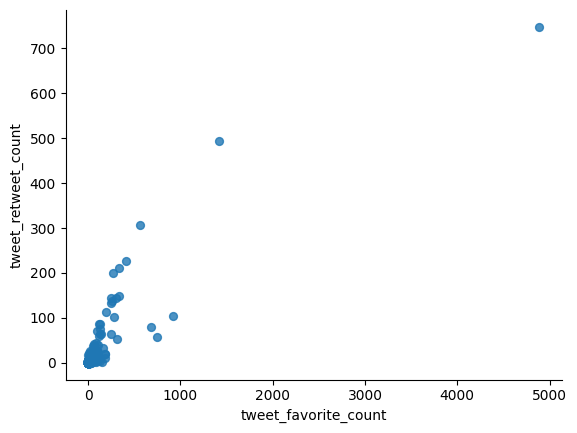

In [ ]:
# @title tweet_favorite_count vs tweet_retweet_count

df.plot(kind='scatter', x='tweet_favorite_count', y='tweet_retweet_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

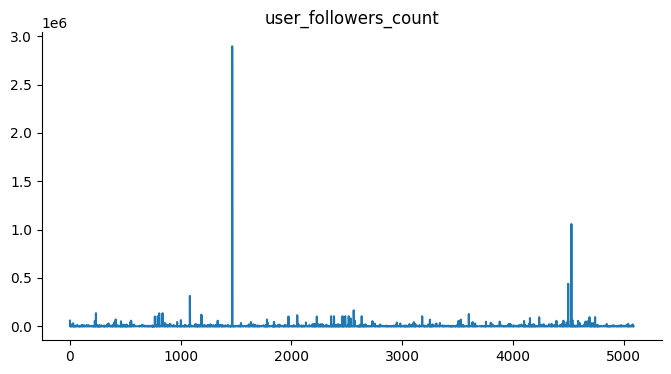

In [ ]:
# @title user_followers_count

df['user_followers_count'].plot(kind='line', figsize=(8, 4), title='user_followers_count')
plt.gca().spines[['top', 'right']].set_visible(False)

# Check for Missing Values in the Tweet_full_Text Column

In [ ]:
#  check missing values in full text column
df = df.dropna(subset=['tweet_full_text'])


In [ ]:
pip install spacytextblob

# Sentiment analysis on the tweet text

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add SpacyTextBlob to the spaCy pipeline
nlp.add_pipe('spacytextblob')

# Define a function to apply sentiment analysis
def get_sentiment(text):
    doc = nlp(text)
    return doc._.polarity

# Apply the function to the 'tweet_full_text' column
df['sentiment'] = df['tweet_full_text'].apply(get_sentiment)
df['sentiment']


0       0.750000
1       0.812500
2       0.270833
3       0.000000
4       0.000000
          ...   
5084    0.000000
5085    1.000000
5086    0.000000
5087    0.000000
5088   -0.100000
Name: sentiment, Length: 5089, dtype: float64

# Correlation matrix

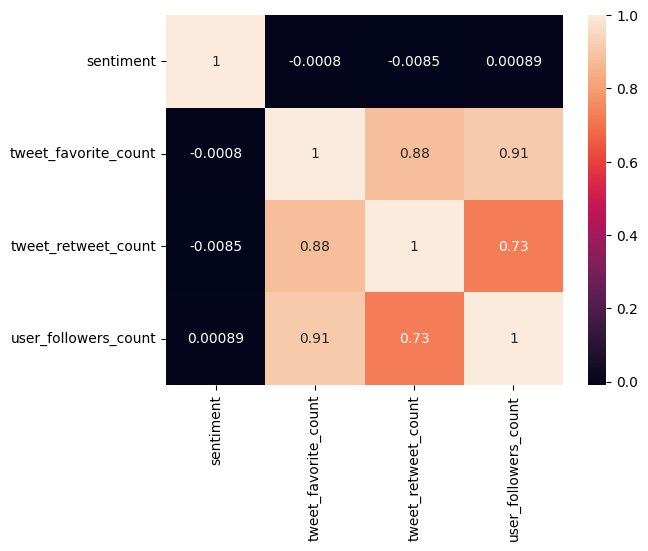

In [ ]:
# Correlation matrix
correlation_matrix = df[['sentiment', 'tweet_favorite_count', 'tweet_retweet_count', 'user_followers_count']].corr()

# Visualization (using matplotlib or seaborn)

sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [ ]:
import nltk
# downloaded the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Text Preprocessing for Sentiment Analysis: Tokenization, Stop Word Removal, and Lemmatization

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and punctuation, and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Apply preprocessing to the tweets
df['processed_text'] = df['tweet_full_text'].apply(preprocess)


# Applying Pre-trained Sentiment Analysis Pipeline to Tweets

In [ ]:
from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply the pipeline to each tweet
df['advanced_sentiment'] = df['tweet_full_text'].apply(lambda x: sentiment_pipeline(x)[0])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.



# Extracting Sentiment Labels and Scores from Analysis Results

In [ ]:
{'label': 'NEGATIVE', 'score': 0.999117}
# Split the sentiment into two columns: one for the label and one for the score
df['sentiment_label'] = df['advanced_sentiment'].apply(lambda x: x['label'])
df['sentiment_score'] = df['advanced_sentiment'].apply(lambda x: x['score'])


# Descriptive statistics

In [ ]:
# Descriptive statistics
print(df['sentiment_score'].describe())
print(df['sentiment_label'].value_counts())


count    5089.000000
mean        0.962329
std         0.086103
min         0.500736
25%         0.979610
50%         0.994126
75%         0.997860
max         0.999863
Name: sentiment_score, dtype: float64
sentiment_label
NEGATIVE    3842
POSITIVE    1247
Name: count, dtype: int64


# Correlation matrix

In [ ]:
# Correlation matrix
correlation_matrix = df[['sentiment_score', 'tweet_favorite_count', 'tweet_retweet_count']].corr()
print(correlation_matrix)


                      sentiment_score  tweet_favorite_count  \
sentiment_score              1.000000              0.002937   
tweet_favorite_count         0.002937              1.000000   
tweet_retweet_count          0.008320              0.880539   

                      tweet_retweet_count  
sentiment_score                  0.008320  
tweet_favorite_count             0.880539  
tweet_retweet_count              1.000000  


# Converting Tweet Timestamps to Datetime and Analyzing Daily Sentiment Trends

In [ ]:
# Convert 'tweet_created_at' to datetime and set it as index
df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'])
df.set_index('tweet_created_at', inplace=True)

# Resample the data by a certain time period (e.g., daily) and calculate mean sentiment score
daily_sentiment = df.resample('D')['sentiment_score'].mean()


<ipython-input-56-3f236d69d328>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'])


# Visualizing Sentiment Score Distribution and Daily Trends

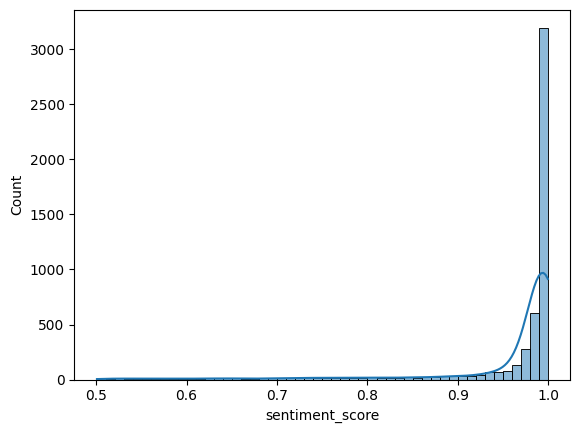

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1401: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


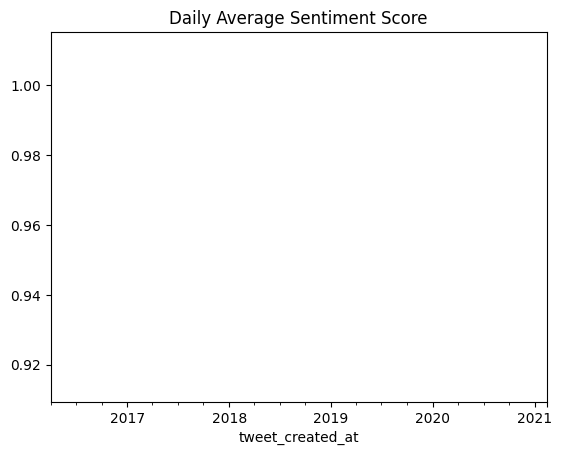

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment score distribution
sns.histplot(df['sentiment_score'], bins=50, kde=True)
plt.show()

# Sentiment over time
daily_sentiment.plot(title='Daily Average Sentiment Score')
plt.show()


# Save the Sentiment_Analysis_Result

In [ ]:
df.to_csv('sentiment_analysis_results.csv')
